<a href="https://colab.research.google.com/github/nancyalaswad90/Classifying-species-of-Iris-flowers-tutorial/blob/master/Predicting_students_performance_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright

# Predicting students performance
---

**Learning Objectives:**
  * Working with *Student Performance [dataset](https://archive.ics.uci.edu/ml/datasets/student+performance)*
  * Predict whether the student has passed or failed through decision tree algorithm.

The dataset contains the data of about 649 students, with and 30 attributes for each student. The attributes formed are mixed categorically – word and phrase, and numeric attributes. These mixed attributes cause a small problem that needs to be fixed. We will need to convert those word and phrase attributes into numbers.

The following screenshot shows the  first half of the attributes from the data:

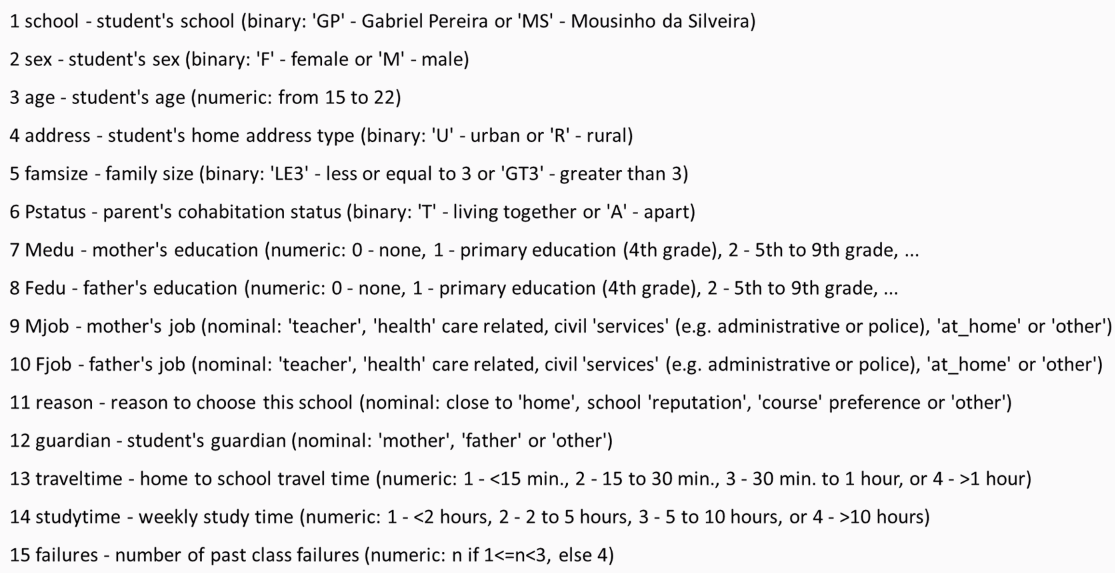

You must have noticed how some of the attributes are categorical, such as the name of the school; sex; Mjob, which is the mother's occupation; Fjob, which is the father's occupation; reason; and guardian. Others, such as age and traveltime, are numeric. The following screenshot shows the second half of the attributes from the data:

__________________________________________________________________________

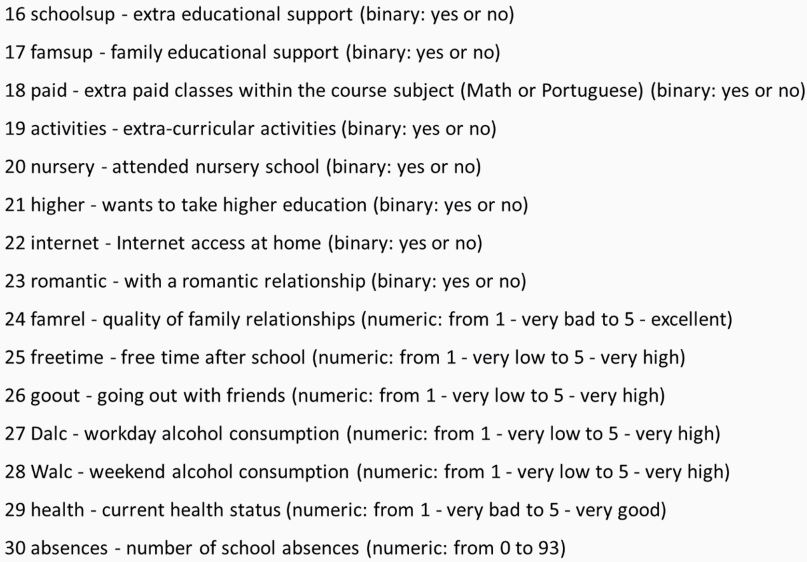

It is clear that some of the attributes are better predictors, such as absences and the number of past failures, while others attributes are probably less predictive, such as whether or not the student is in a romantic relationship or whether the student's guardian is the mother, father, or someone else. 

The decision tree will attempt to identify the most important or predictive attributes using this information gain provided. We'll be able to look at the resulting tree and identify the most predictive attributes because the most predictive attributes will be the earliest questions.



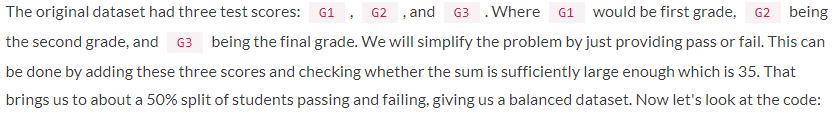

## load dataset

In [0]:
# load dataset
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
import zipfile

In [0]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
with zipfile.ZipFile("student.zip","r") as zip_ref:
    zip_ref.extractall("")

d = pd.read_csv('student-por.csv', sep=';')
len(d)

--2019-07-31 09:04:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip.2’

student.zip.2       100%[===================>]  20.00K  --.-KB/s    in 0.06s   

2019-07-31 09:04:14 (319 KB/s) - ‘student.zip.2’ saved [20478/20478]



649

Using the length variable, we can see that there are 649 rows.

---

## Data prepration

Next we add columns for pass and fail. The data in these columns would contain 1 or 0, where 1 means pass and 0 means fail.

We are going to do that by computing with every row what the sum of the test scores would be. This will be calculated as if the sum of three score is greater than or equal to 35, 1 is given to the student and failing to that rule 0 is given to the student. 

//To do this we will use **apply** function (a feature of Pandas) to apply this rule on every row of the dataset. Here axis=1 means use apply per row and axis=0 would mean apply per column. The next line means that a variable needs to be dropped: either G1, G2, G3.

In [0]:
d['pass']=d.apply(lambda row:1 if(row['G1']+row['G2']+row['G3'])>=35 else 0,axis=1)
d.drop(['G2','G1','G3'],axis=1,inplace=True)

As mentioned before, some of these columns are words or phrases, such as Mjob, Fjob, internet, and romantic. These columns need to be converted into numbers so we use **one-hot encoding** method, which can be done using the **get_dummies** function (a Pandas feature), and we need to mention which columns are the ones that we want to turn into numeric form.



```
In the case of Mjob, for example, the function it is going to look at all the different possible answers or the values in that column and it's going to give each value a column name. These columns will receive names such as rename the columns to Mjobat_home, Mjobhealth, or Mjob. These new columns, for example, the Mjobat_home column will have value 1 and the rest will have 0. This means only one of the new columns generated will have one.
```



In [0]:
d=pd.get_dummies(d,columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
 'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


---

## Build models

Now we will show you another way to split the data.
We will shuffle the rows and produce a training set with first 500 rows and rest 149 rows for test set and then we just need to get attributes form the training set which means we will get rid of the pass column and save the pass column separately. The same is repeated for the testing set. We will apply the attributes to the entire dataset and save the pass column separately for the entire dataset. 



```
Now we will find how many passed and failed from the entire dataset. This can be done by computing the percentage number of passed and failed which will give us a result of 328 out of 649. This being the pass percentage which is roughly around 50% of the dataset. This constitutes a well-balanced dataset:
```




In [0]:
#shuffle rows
d=d.sample(frac=1)
#split training amd testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

#number of passing students in whole dataset
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


We will perform multi-class classification through `DecisionTreeClassifier` from *scikit-learn* package



```
Here we will use the entropy or information gain metric to decide when to split. We will split at a depth of five questions, by using max_depth=5 as an initial tree depth to get a feel for how the tree is fitting the data
```



In [0]:
#fit a decision tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

Let's create a visual representation of the tree.

In [0]:
# save tree
dot_data = tree.export_graphviz(t, out_file="student_performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"],
                     filled=True, rounded=True)

import pydot
(graph,) = pydot.graph_from_dot_file('student_performance.dot')
graph.write_png('student_performance.png')
# due to the image size it's better to download it and view it on your machine.

let's check the score of the tree using the testing set that we created earlier

In [0]:
t.score(d_test_att, d_test_pass)

0.6845637583892618

The result we had was approximately 68%. Now let's cross verify the result.

In [0]:
scores = cross_val_score(t, d_att, d_pass, cv=5)
#show avarage score and +/- two standered deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.06)


Now let's use various `max_depth` values from 1 to 20, Considering we make a tree with one question or with 20 questions having depth value of 20 which will give us questions more than 20 which is you will have to go 20 steps down to reach a leaf node.

Then we will perform cross-validation and save and print our answer

In [0]:
for max_depth in range(1, 20):
    t=tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accurecy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accurecy: 0.64 (+/- 0.06)
Max depth: 2, Accurecy: 0.69 (+/- 0.07)
Max depth: 3, Accurecy: 0.70 (+/- 0.02)
Max depth: 4, Accurecy: 0.70 (+/- 0.05)
Max depth: 5, Accurecy: 0.71 (+/- 0.07)
Max depth: 6, Accurecy: 0.68 (+/- 0.05)
Max depth: 7, Accurecy: 0.68 (+/- 0.10)
Max depth: 8, Accurecy: 0.68 (+/- 0.13)
Max depth: 9, Accurecy: 0.68 (+/- 0.09)
Max depth: 10, Accurecy: 0.67 (+/- 0.11)
Max depth: 11, Accurecy: 0.67 (+/- 0.07)
Max depth: 12, Accurecy: 0.65 (+/- 0.11)
Max depth: 13, Accurecy: 0.63 (+/- 0.09)
Max depth: 14, Accurecy: 0.67 (+/- 0.07)
Max depth: 15, Accurecy: 0.65 (+/- 0.08)
Max depth: 16, Accurecy: 0.64 (+/- 0.13)
Max depth: 17, Accurecy: 0.64 (+/- 0.07)
Max depth: 18, Accurecy: 0.64 (+/- 0.07)
Max depth: 19, Accurecy: 0.66 (+/- 0.07)


Max depth=5 is the best which was compared accuracy from the average we found earlier.

---

## Let's visualize the output

The following screenshot shows the data that we will be using to the create graph:


In [0]:
depth_acc = np.empty((19,3), float)
i=0
for max_depth in range(1, 20):
    t=tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i +=1

depth_acc

array([[ 1.        ,  0.63783374,  0.06299102],
       [ 2.        ,  0.68557484,  0.06949977],
       [ 3.        ,  0.69956356,  0.02433022],
       [ 4.        ,  0.70412004,  0.04056971],
       [ 5.        ,  0.71196666,  0.06768922],
       [ 6.        ,  0.68407143,  0.05642362],
       [ 7.        ,  0.67959916,  0.09247486],
       [ 8.        ,  0.6796465 ,  0.12511146],
       [ 9.        ,  0.67184685,  0.08391644],
       [10.        ,  0.67335063,  0.12236379],
       [11.        ,  0.64556146,  0.07549921],
       [12.        ,  0.65789373,  0.09509547],
       [13.        ,  0.64567999,  0.08190036],
       [14.        ,  0.66101727,  0.09474512],
       [15.        ,  0.63789264,  0.08873735],
       [16.        ,  0.64253242,  0.08983987],
       [17.        ,  0.63789282,  0.11400671],
       [18.        ,  0.62401034,  0.07908146],
       [19.        ,  0.64407052,  0.06317719]])

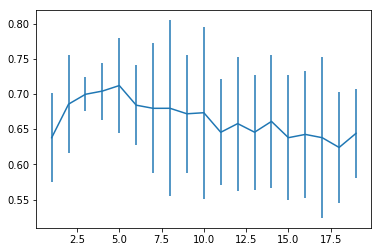

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

The error bars shown in the following screenshot are the standard deviations in the score, which concludes that a depth of 5 is ideal for this dataset. and our assumption of 5 was correct.


Also this graph telling us more depth doesn't give any more power.